## Observations and Insights 

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how = 'outer', on = "Mouse ID")
# Display the data table for preview
combined_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.

combined_df["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df[combined_df.duplicated(["Mouse ID", "Timepoint"])]

duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mice = combined_df.drop_duplicates(subset = ["Mouse ID", "Timepoint"], keep = "first")

cleaned_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice["Mouse ID"].value_counts()

r604    10
c832    10
o926    10
z795    10
x401    10
        ..
v199     1
u153     1
x336     1
o848     1
d133     1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mice_grouped = cleaned_mice.groupby(["Drug Regimen"])
# Equations used to generate the summary dataframe
mice_mean = mice_grouped["Tumor Volume (mm3)"].mean()
mice_median = mice_grouped["Tumor Volume (mm3)"].median()

mice_var = mice_grouped["Tumor Volume (mm3)"].var()

mice_std = mice_grouped["Tumor Volume (mm3)"].std()

mice_sem = mice_grouped["Tumor Volume (mm3)"].sem()
# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_table = pd.DataFrame({"Mean": mice_mean, "Median": mice_median, 
                              "Variance": mice_var, "Standard Deviation": mice_std, "SEM": mice_sem})

summary_table


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
num_mice_drug = cleaned_mice[["Drug Regimen", "Mouse ID"]]
#equation used to generate the count of how many mice are used for each drug treatment
num_mice_drug = num_mice_drug.groupby("Drug Regimen").count()["Mouse ID"]


Text(0, 0.5, 'Total Number of Mice')

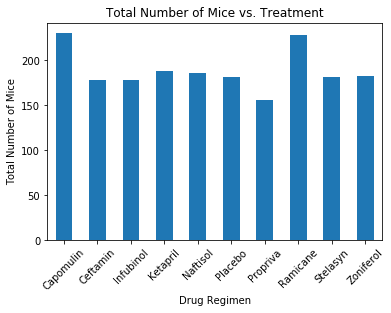

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
num_mice_drug.plot.bar(rot = 45)

plt.title("Total Number of Mice vs. Treatment")
plt.ylabel("Total Number of Mice")


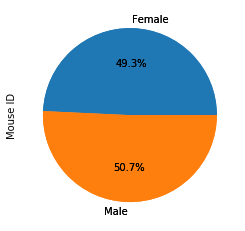

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = cleaned_mice.groupby(["Sex"])["Mouse ID"].count()

gender_df.plot.pie(y = "Mouse ID", autopct='%1.1f%%')
gender_df = cleaned_mice.groupby(["Sex"])["Mouse ID"].count()

gender_df.plot.pie(y = "Mouse ID", autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x26660688c88>,
 [Text(0.02562299800632446, 1.099701533132135, 'Female'),
  Text(-0.025623100967812958, -1.099701530733132, 'Male')],
 [Text(0.01397618073072243, 0.5998371998902553, '49.3%'),
  Text(-0.01397623689153434, -0.5998371985817083, '50.7%')])

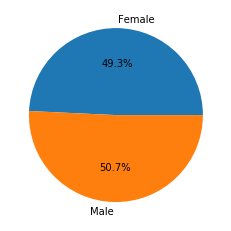

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = gender_df

labels = ["Female", "Male"]
plt.pie(gender_count, labels = labels, autopct='%1.1f%%')


## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
finaltime_df = cleaned_mice[["Mouse ID", "Timepoint"]]

# Start by getting the last (greatest) timepoint for each mouse
finaltime = finaltime_df.groupby(["Mouse ID"])["Timepoint"].transform(max)

finaltime_df["Final Timepoint"] = finaltime

finaltime_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combined = pd.merge(finaltime_df, cleaned_mice, on = ["Mouse ID", "Timepoint"], how = "right")


combined


C:\Users\ferna\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Mouse ID,Timepoint,Final Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,0,45,Ramicane,Male,21,16,45.000000,0
1,k403,5,45,Ramicane,Male,21,16,38.825898,0
2,k403,10,45,Ramicane,Male,21,16,35.014271,1
3,k403,15,45,Ramicane,Male,21,16,34.223992,1
4,k403,20,45,Ramicane,Male,21,16,32.997729,1
...,...,...,...,...,...,...,...,...,...
1883,z969,25,45,Naftisol,Male,9,30,63.145652,2
1884,z969,30,45,Naftisol,Male,9,30,65.841013,3
1885,z969,35,45,Naftisol,Male,9,30,69.176246,4
1886,z969,40,45,Naftisol,Male,9,30,70.314904,4


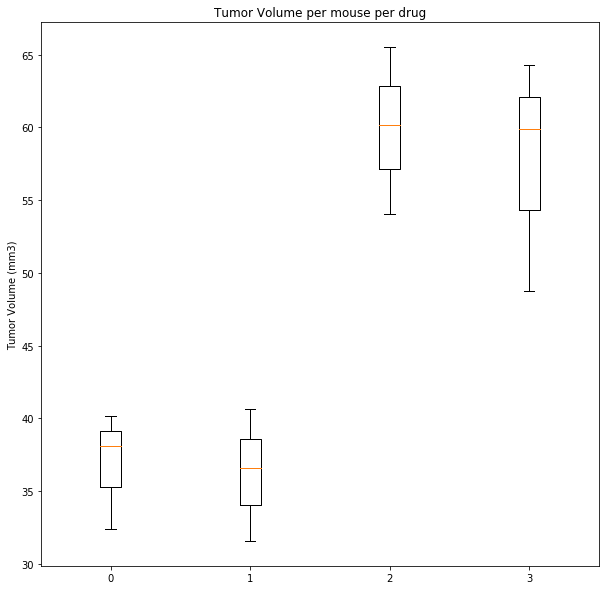

In [15]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
drug_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_volcap = []
tumor_volram = []
tumor_volinf = []
tumor_volceft = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in range(len(combined)):
    # Locate the rows which contain mice on each drug and get the tumor volumes
    if (combined.iloc[i, 1] == combined.iloc[i, 2]) & (combined.iloc[i,3] == drug_regimens[0]):
        tumor_volcap.append([combined.iloc[i,7]])
    
    elif (combined.iloc[i, 1] == combined.iloc[i, 2]) & (combined.iloc[i,3] == drug_regimens[1]):
        tumor_volram.append([combined.iloc[i,7]])
        
    elif (combined.iloc[i, 1] == combined.iloc[i, 2]) & (combined.iloc[i,3] == drug_regimens[2]):
        tumor_volinf.append([combined.iloc[i,7]])
        
    elif (combined.iloc[i, 1] == combined.iloc[i, 2]) & (combined.iloc[i,3] == drug_regimens[3]):
        tumor_volceft.append([combined.iloc[i,7]])

       
    
final_tumorvol = [tumor_volcap, tumor_volram, tumor_volinf, tumor_volceft]

final_tumorvol

fig1, ax1 = plt.subplots(figsize = (10, 10))

for drug in range(len(drug_regimens)):
    quartiles = np.quantile(final_tumorvol[drug], [0.25, 0.5, 0.75])

    lowerq = quartiles[0]
    upperq = quartiles[2]
    IQR = upperq - lowerq

    lower_bound = lowerq - (1.5*IQR)
    upper_bound = upperq + (1.5*IQR)
    # Generate a box plot of the final tumor volume of each mouse across four regimens of interest
    ax1.boxplot(quartiles, positions = [drug])
    ax1.set_title('Tumor Volume per mouse per drug')
    ax1.set_ylabel('Tumor Volume (mm3)')
    #ax1.set_xticks("Capomulin", "Ramicane", "Infubinol", "Ceftamin")

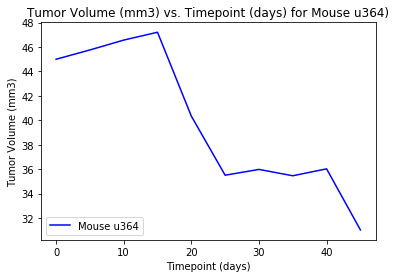

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
mouse_grouped = combined.set_index("Mouse ID")

mouse_cap = mouse_grouped.loc['u364']

mouse_cap


Mouse_u364, = plt.plot(mouse_cap["Timepoint"], mouse_cap["Tumor Volume (mm3)"], color="blue", label="Mouse u364")

plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.title("Tumor Volume (mm3) vs. Timepoint (days) for Mouse u364)")
plt.legend(loc= "lower left")

## Line and Scatter Plots

Text(0.5, 1.0, 'Avg. Tumor Vol. (mm3) vs. Weight (g) for Capomulin Drug Regimen')

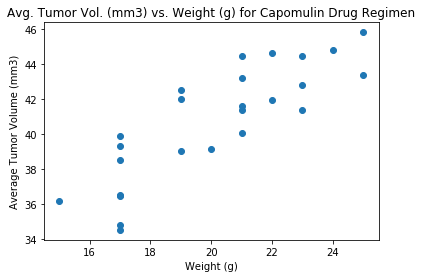

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_df = combined.loc[combined["Drug Regimen"] == "Capomulin"]
cap_df
grouped_df = cap_df.groupby(cap_df["Mouse ID"]).mean()
grouped_df["Weight (g)"].astype(int)
avg_tumorvol = []
mouse_weight = []
for i in range(len(grouped_df)):

    avg_tumorvol.append(grouped_df.iloc[i,4])
    mouse_weight.append(float(grouped_df.iloc[i,3]))

    
mouse_weight = np.array(mouse_weight)
avg_tumorvol = np.array(avg_tumorvol)
plt.scatter(mouse_weight, avg_tumorvol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Avg. Tumor Vol. (mm3) vs. Weight (g) for Capomulin Drug Regimen")

Text(0.5, 1.0, 'Avg. Tumor Vol. (mm3) vs. Weight (g) for Capomulin Drug Regimen')

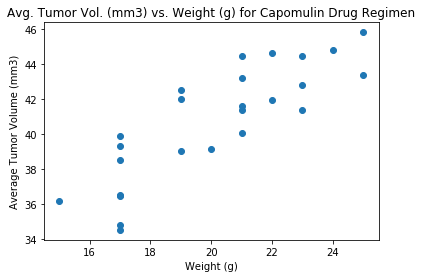

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_df = combined.loc[combined["Drug Regimen"] == "Capomulin"]
cap_df
grouped_df = cap_df.groupby(cap_df["Mouse ID"]).mean()
grouped_df["Weight (g)"].astype(int)
avg_tumorvol = []
mouse_weight = []
for i in range(len(grouped_df)):

    avg_tumorvol.append(grouped_df.iloc[i,4])
    mouse_weight.append(float(grouped_df.iloc[i,3]))

    
mouse_weight = np.array(mouse_weight)
avg_tumorvol = np.array(avg_tumorvol)
plt.scatter(mouse_weight, avg_tumorvol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Avg. Tumor Vol. (mm3) vs. Weight (g) for Capomulin Drug Regimen")

## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(mouse_weight, avg_tumorvol)
print(f"The correlation between Mouse Weight and Average Tumor Volume: {round(correlation[0],2)}")

linregress(mouse_weight, avg_tumorvol)=(slope, intercept, rvalue, pvalue, stderr)

regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight,avg_tumorvol)

plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

SyntaxError: can't assign to function call (<ipython-input-20-8b33cb86f54f>, line 8)